## Seaborn

![seaborn](https://drive.google.com/uc?id=1j1ZM-tMaWYNCa_YkMGFIfymcrLS0MWG3)


- 엄청나게 화려한 시각화 기법들을 제공하며, 기본적으로 이쁩니다.
>  histplot, barplot, jointplot, lineplot, ...


- pandas DataFrame과 매우 호환이 잘 됩니다.

  >  e.g. sns.xxxplot(data=df)    **<--- 기본세팅!**

In [1]:
# %pip install seaborn==0.13.2

In [1]:
# 라이브러리와 데이터를 불러오고, 시각화를 위한 세팅을 합니다.
import seaborn as sns
from seaborn import load_dataset
# from seaborn import set_palette, color_palette

# cp = color_palette()
# set_palette(cp)

data = load_dataset('penguins').dropna() # NaN가 하나라도 포함된 row가 있다면 제외.
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Histplot 

- 가장 기본적으로 사용되는 히스토그램을 출력하는 plot.


- 전체 데이터를 특정 구간별 정보를 확인할 때 사용합니다.


- **수치형 데이터(연속형)의 대략적인 분포**를 확인할 때 사용합니다.


- 구간별 count를 계산해서 막대로 표현하는 그래프.

(45.0, 60.0)

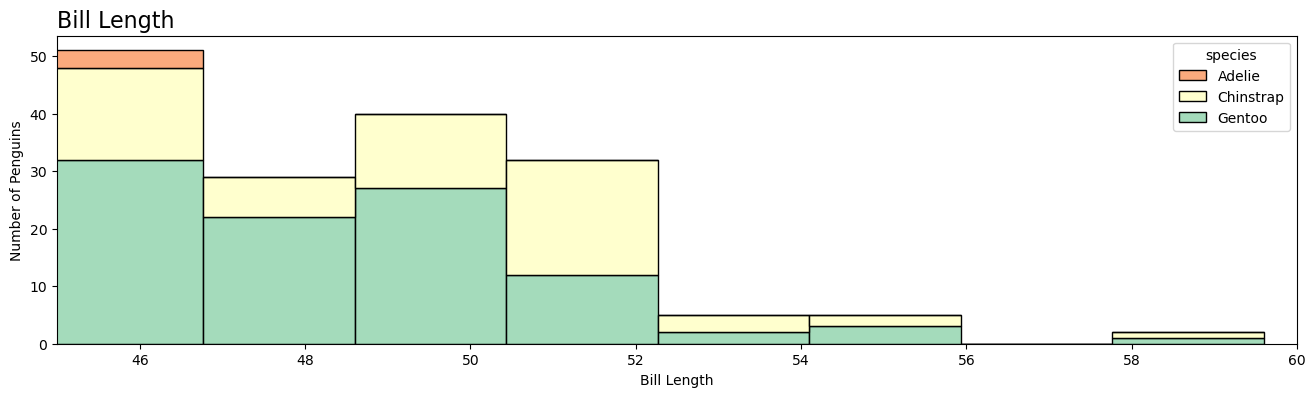

In [3]:
# penguin 데이터에 histplot을 출력합니다.
## color palette name : Blues(단일색상), Set2(discrete - 서로 색상이 비교적 다른 편), viridis, Spectral(continuous - 연속적으로 색상 표현)
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.title("Bill Length", fontsize=16, loc='left')
sns.histplot(data=data, x='bill_length_mm', bins=15, hue='species', multiple='stack', palette='Spectral')
plt.xlabel("Bill Length")
plt.ylabel('Number of Penguins')
plt.xlim(45, 60)
#plt.xticks([n*10 for n in range(7)])

### Displot 

- distribution들을 여러 subplot들로 나눠서 출력해주는 plot.


- displot에 kind를 변경하는 것으로, histplot, kdeplot, ecdfplot 모두 출력이 가능합니다.

e.g. displot(kind="hist")

/Users/emphistudio/anaconda3/envs/fastcampus/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


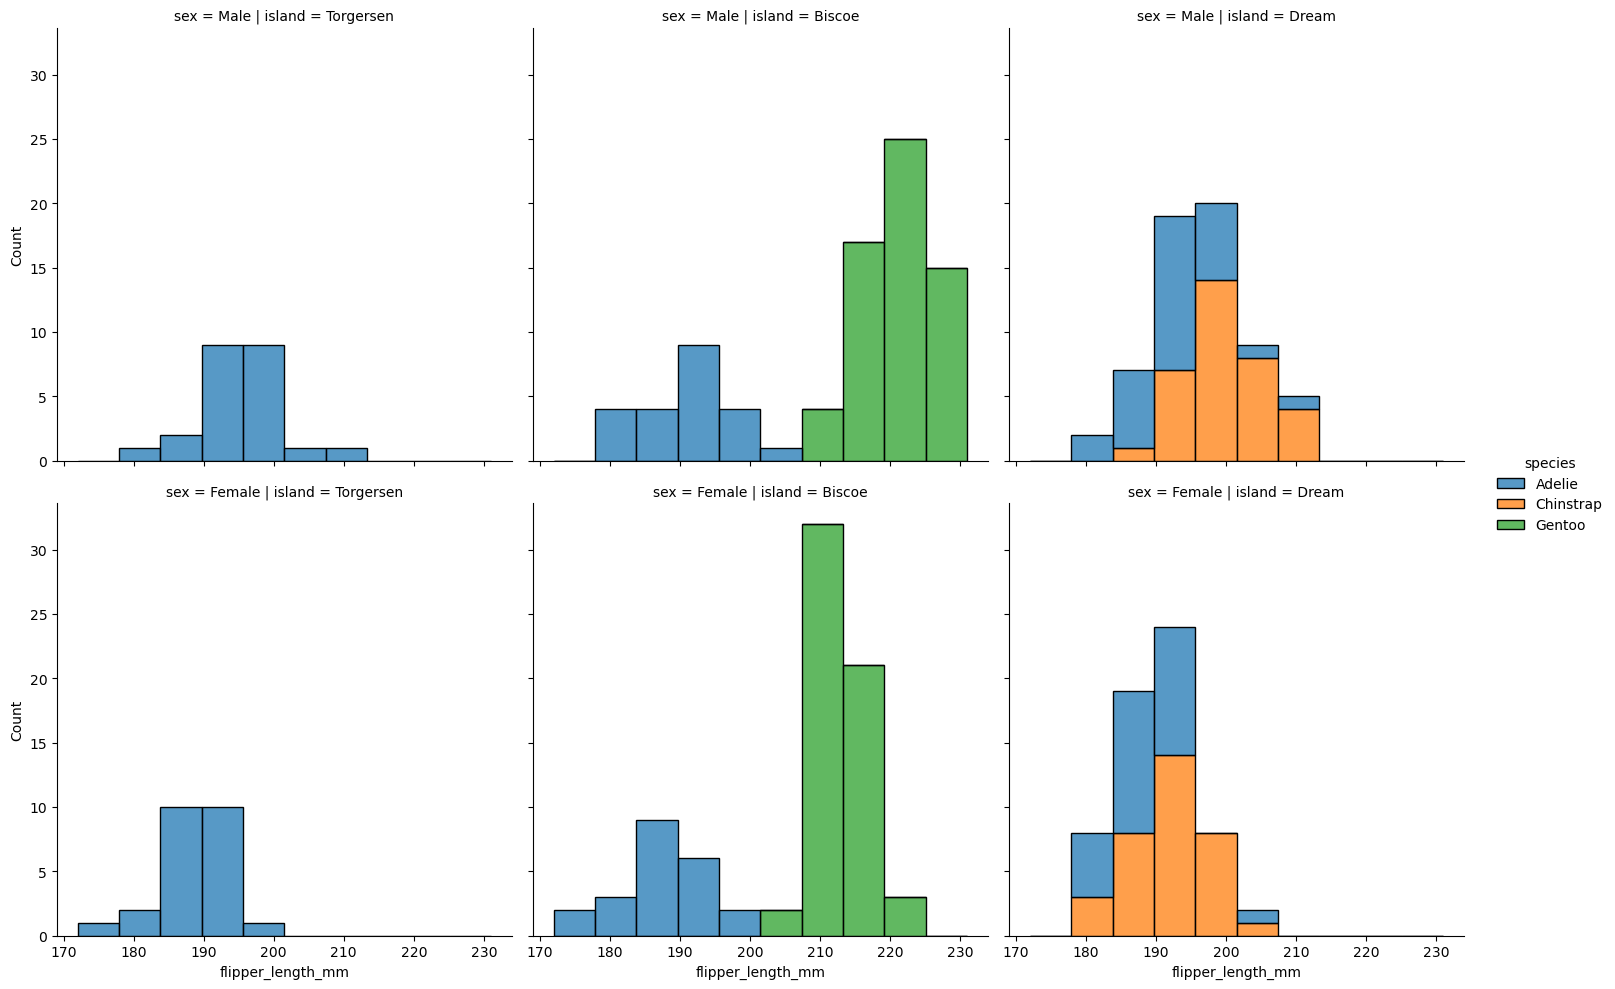

In [13]:
# penguin 데이터에 displot을 출력합니다.
sns.displot(data=data, x="flipper_length_mm", kind='hist', col='island', row='sex', hue='species',
            multiple='stack')

### Barplot

- 어떤 데이터에 대한 값의 크기를 막대로 보여주는 plot. (a.k.a. 막대그래프)


- 가로 / 세로 두 가지로 모두 출력 가능합니다.


- 히스토그램과는 다릅니다!

<Axes: xlabel='body_mass_g', ylabel='species'>

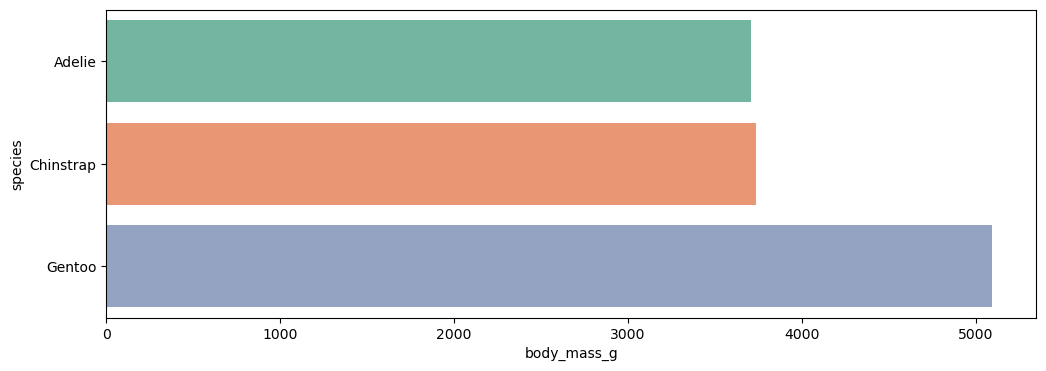

In [23]:
# penguin 데이터에 barplot을 출력합니다.
plt.figure(figsize=(12, 4))
sns.barplot(data=data, y='species', x='body_mass_g', errorbar=None, hue='species', palette='Set2')

### Countplot

- 범주형 속성을 가지는 데이터들의 histogram을 보여주는 plot.



- 종류별 count를 보여주는 방법입니다.

<Axes: xlabel='sex', ylabel='count'>

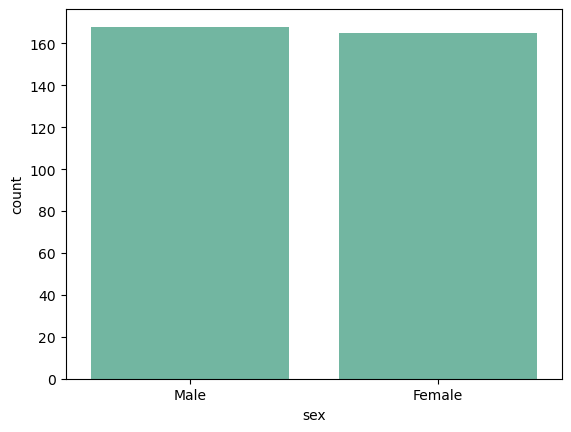

In [28]:
# penguin 데이터에 countplot을 출력합니다.
sns.countplot(data=data, x='sex')

### Boxplot (중요!!)


- 데이터의 각 종류별로 사분위 수(quantile)를 표시하는 plot.


- 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법입니다.


- box와 전체 range의 그림을 통해 outlier를 찾기 쉽습니다. (IQR : Inter-Quantile Range)

<Axes: xlabel='species', ylabel='body_mass_g'>

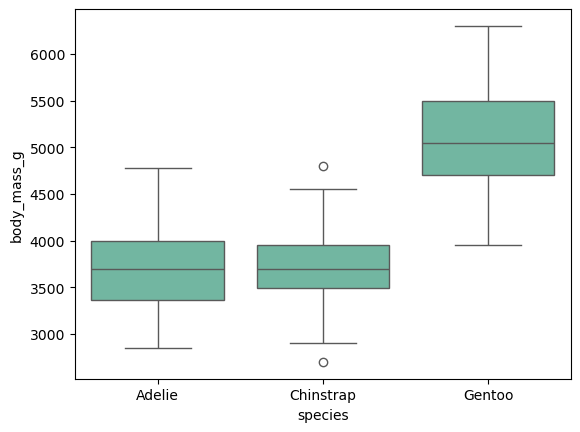

In [30]:
# penguin 데이터에 boxplot을 출력합니다.
sns.boxplot(data=data, x='species', y='body_mass_g')
# What is boxplot?

### Violinplot 

- 데이터에 대한 분포 자체를 보여주는 plot.


- boxplot과 비슷하지만, 전체 분포에 대한 그림을 보여준다는 점에서 boxplot과 다릅니다.


- 보통 boxplot과 함께 표시하면, 평균 근처에 데이터가 얼마나 있는지(boxplot) 전체적으로 어떻게 퍼져있는지(violinplot) 모두 확인이 가능합니다.

In [ ]:
# penguin 데이터에 violinplot을 출력합니다.


### Lineplot

- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 plot. (선 그래프)


- 수치형 지표들 간의 경향을 파악할 때 많이 사용합니다.

<Axes: xlabel='id', ylabel='body_mass_g'>

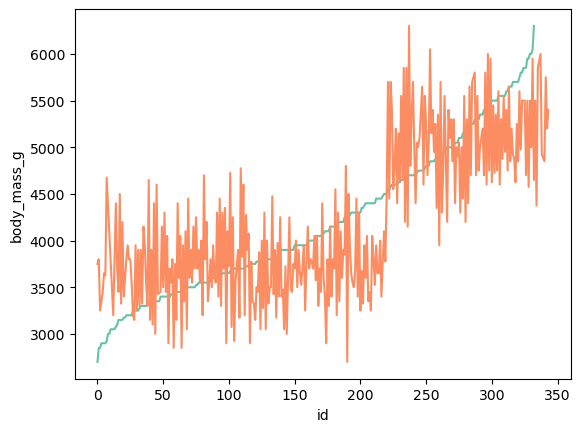

In [37]:
# penguin 데이터에 lineplot을 출력합니다.
import numpy as np

temp = data.sort_values(by='body_mass_g') 
temp['id'] = np.arange(len(temp))
sns.lineplot(data=temp, x='id', y='body_mass_g')

sns.lineplot(x=data.index, y=data.body_mass_g)

### Pointplot

- 특정 수치 데이터를 error bar와 함께 출력해주는 plot.



- 수치 데이터를 다양한 각도에서 한 번에 바라보고 싶을 때 사용합니다.


- 데이터와 error bar를 한 번에 찍어주기 때문에, 살펴보고 싶은 특정 지표들만 사용하는 것이 좋습니다.

In [ ]:
# penguin 데이터에 pointplot을 출력합니다.


### Scatterplot

- lineplot과 비슷하게 x, y에 대한 전체적인 분포를 확인하는 plot.


- lineplot은 경향성에 초점을 둔다면, scatterplot은 데이터 그 자체가 퍼져있는 모양에 중점을 둡니다.

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

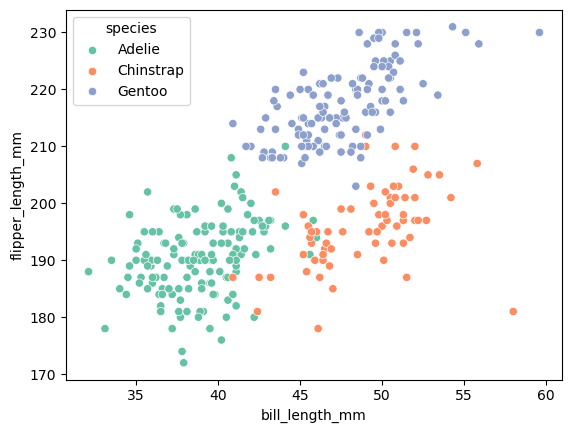

In [41]:
# penguin 데이터에 scatterplot을 출력합니다.
sns.scatterplot(data=data, x='bill_length_mm', y='flipper_length_mm', hue='species')

### Pairplot


- 주어진 데이터의 각 feature들 사이의 관계를 표시하는 Plot.


- scatterplot, FacetGrid, kdeplot을 이용하여 feature간의 관계를 잘 보여줍니다.


- 각 feature에 대해 계산된 모든 결과를 보여주기 때문에, feature가 많은 경우 사용하기 적합하지 않습니다.

/Users/emphistudio/anaconda3/envs/fastcampus/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


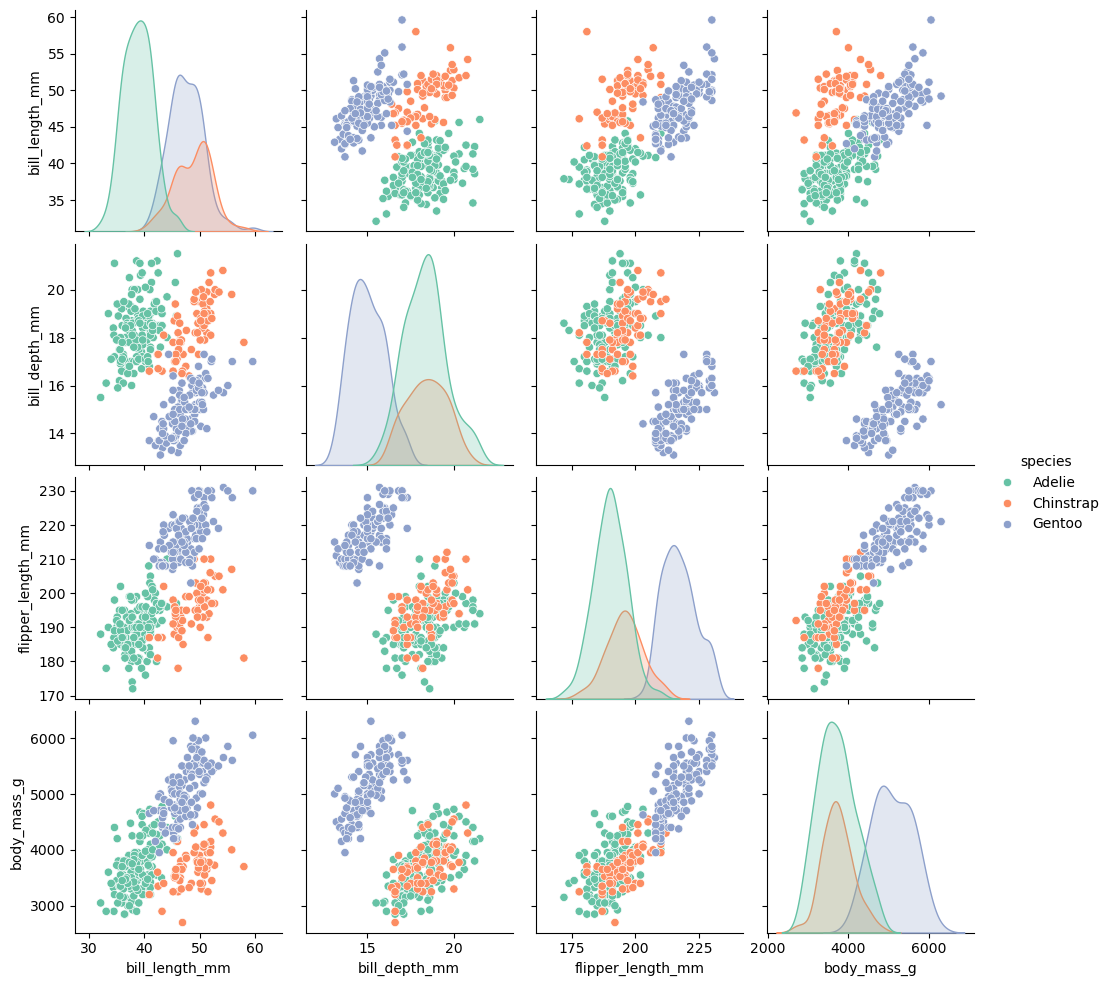

In [42]:
# penguin 데이터에 pairplot을 출력합니다.
sns.pairplot(data=data, hue='species')

### Heatmap

- 정사각형 그림에 데이터에 대한 정도 차이를 색 차이로 보여주는 plot.


- 말 그대로 heatmap이기 때문에, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여줍니다.


- pairplot과 비슷하게 feature간 관계를 시각화할 때 많이 사용합니다.

**상관관계란?**
- 어떤 X값의 변화에 따라 Y값의 선형적으로 변화하는지를 측정한 지표.

- [-1, 1]


e.g. 아이스크림 판매량 증가 <----> 상어에 물린 사람 수

In [48]:
# 각 feature간 상관관계를 파악하기 위해 Correlation matrix를 만듭니다.
corr = data.corr(numeric_only=True)

<Axes: >

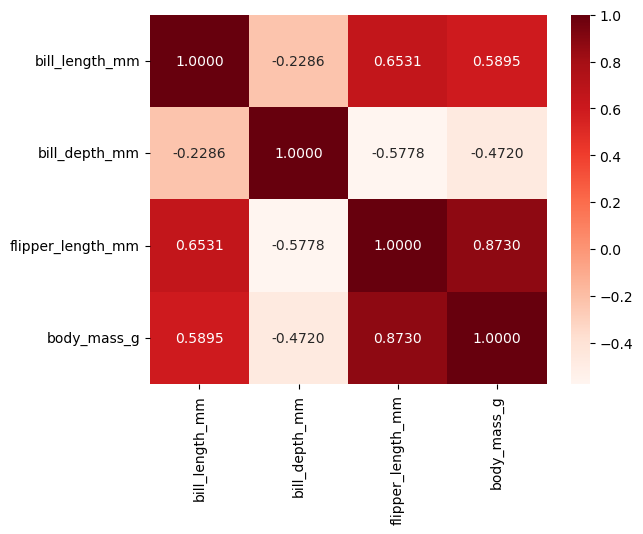

In [67]:
# penguin 데이터에 heatmap을 출력합니다.
sns.heatmap(data=corr, annot=True, fmt='.4f', cmap='Reds')